## HW 1 is due on 02/15/2024 at 11:59 PM
## Instructions

1) Label your homework solutions with your ISU idnumber ( first 4 digits), such as HW1_Solutions_3938. This HW will be peer + Instructor graded.

2) Deliverables: You need to submit 3 files.
* ipython notebook file with all of your solutions and codes
* HTML file of your ipython notebook file.
* Your HW solution in a pdf file. Please write this part of the solution in a research paper format: Give a proper title, solve each problems and write findings so that you tell a story with the data set you have and the problems you need to solve. Attach plots, figures,  wherever necessary. 
 
3) Special instructions on how to solve the HW problems.
* For each problem, begin by solving it independently to the best of your ability. You can use ChatGPT, Google Bard, or other AI tools to seek hints, guidance, or alternative approaches to the problems. Engage these AI tools to enhance your understanding and explore different solution strategies.

* After completing all the problems, reflect on your experience by summarizing how you used ChatGPT/Bard or other AI tools, the specific problems you sought help with, and the valuable insights they offered. Discuss the strengths and limitations of both your initial solutions and the AI-generated ones for each of the problems. This integrated approach helps you leverage AI's power while refining your own analytical skills. It's not just about getting the answer; it's about learning through the process!

4) To submit your homework solutions, go to our course in Canvas --> Assignments --> HW 1 --> Submit Assignment --> Click "Choose File" --> choose the HTML file you saved --> Click another file--> choose ipynb file--> Repeat this process to add a pdf file--submit. Once you submit, download and check to ensure that you have submitted the correct files.

5) <font color='red'> WARNING: Your submission will be compared against other students' solutions and online databases to check for plagiarism. Disclosure of this assignment and assignment answers to anybody or any website is a contributory infringement of academic dishonesty at ISU. Do not share or post course materials without the express written consent of the copyright holder and instructor. The class will follow Iowa State University’s policy on academic dishonesty. Anyone suspected of academic dishonesty will be reported to the Dean of Students Office.</font>

#### Each problem is worth 20 points. Total $\bf 20\times 5 = 100$.

### Problem 1. 
In this problem, you will clean the data and perform exploratory data analysis (EDA) before proceeding with model development in subsequent tasks. For each part, explain the rationale behind your actions.

* The data contains duplications. Identify the cause of this issue and resolve it by eliminating the duplicates.
* Remove any column(s) that are not useful for regression or classification models.
* Identify and count missing values and address them by either removing or imputing them appropriately.
* Conduct EDA on the remaining columns. This may involve handling non-numerical values, changing data types, transforming or standardizing variables if necessary, and dummy coding certain variables.
* For classification purposes, create a column, using 'average rating' to create a new column called 'Rating' as below.
| averageRating | Rating |
| -------------| --------------------------- |
| >= 8      | *****        |
| >= 7      | ****     |
| >= 6     | ***     |
| >= 5      | **    |
| < 5      | *   |

In [1]:
import pandas as pd
dataset = pd.read_csv('/Users/arnoldukagwu/Desktop/Homework 2/newimdb.csv')

In [2]:
dataset.head()

,Unnamed: 0,tconst,types,isOriginalTitle,titleType,originalTitle,isAdult,startYear,runtimeMinutes,genres,directors,category,averageRating,numVotes
0,6475881,tt0111596,imdbDisplay,0.0,movie,Vazir,0.0,2015,\N,"Action,Crime,Drama",nm13648797,editor,8.1,63.0
1,6475882,tt0111596,imdbDisplay,0.0,movie,Vazir,0.0,2015,\N,"Action,Crime,Drama",nm13648797,actor,8.1,63.0
2,6475884,tt0111596,imdbDisplay,0.0,movie,Vazir,0.0,2015,\N,"Action,Crime,Drama",nm13648797,actress,8.1,63.0
3,6475886,tt0111596,imdbDisplay,0.0,movie,Vazir,0.0,2015,\N,"Action,Crime,Drama",nm13648797,director,8.1,63.0
4,6475887,tt0111596,imdbDisplay,0.0,movie,Vazir,0.0,2015,\N,"Action,Crime,Drama",nm13648797,writer,8.1,63.0


In [3]:
dataset.tail()

,Unnamed: 0,tconst,types,isOriginalTitle,titleType,originalTitle,isAdult,startYear,runtimeMinutes,genres,directors,category,averageRating,numVotes
2795290,32998479,tt9916730,original,1.0,movie,6 Gunn,0.0,2017,116,\N,nm10538612,actor,8.1,9.0
2795291,32998483,tt9916730,original,1.0,movie,6 Gunn,0.0,2017,116,\N,nm10538612,director,8.1,9.0
2795292,32998484,tt9916730,original,1.0,movie,6 Gunn,0.0,2017,116,\N,nm10538612,producer,8.1,9.0
2795293,32998486,tt9916730,original,1.0,movie,6 Gunn,0.0,2017,116,\N,nm10538612,cinematographer,8.1,9.0
2795294,32998487,tt9916730,original,1.0,movie,6 Gunn,0.0,2017,116,\N,nm10538612,editor,8.1,9.0


In [4]:
dimensions = dataset.shape
print(dimensions)

(2795295, 14)


In [5]:
duplicate_rows = dataset[dataset.duplicated()]
print(duplicate_rows)

Empty DataFrame
Columns: [Unnamed: 0, tconst, types, isOriginalTitle, titleType, originalTitle, isAdult, startYear, runtimeMinutes, genres, directors, category, averageRating, numVotes]
Index: []


In [6]:
dataset_no_duplicates = dataset.drop_duplicates()

# Removed the types column
columns_to_keep = ['tconst', 'isOriginalTitle', 'titleType', 'originalTitle', 'isAdult', 'startYear', 'runtimeMinutes', 'genres', 'directors', 'category', 'averageRating', 'numVotes']
dataset_no_duplicates = dataset_no_duplicates[columns_to_keep]
dataset=dataset_no_duplicates

print("Updated Dataset Without Duplicates:")
print(dataset_no_duplicates.head())


Updated Dataset Without Duplicates:
      tconst  isOriginalTitle titleType originalTitle  isAdult  startYear  \
0  tt0111596              0.0     movie         Vazir      0.0       2015   
1  tt0111596              0.0     movie         Vazir      0.0       2015   
2  tt0111596              0.0     movie         Vazir      0.0       2015   
3  tt0111596              0.0     movie         Vazir      0.0       2015   
4  tt0111596              0.0     movie         Vazir      0.0       2015   

  runtimeMinutes              genres   directors  category  averageRating  \
0             \N  Action,Crime,Drama  nm13648797    editor            8.1   
1             \N  Action,Crime,Drama  nm13648797     actor            8.1   
2             \N  Action,Crime,Drama  nm13648797   actress            8.1   
3             \N  Action,Crime,Drama  nm13648797  director            8.1   
4             \N  Action,Crime,Drama  nm13648797    writer            8.1   

   numVotes  
0      63.0  
1      63.

In [7]:
#Convert runtimeMinutes to numeric
dataset['runtimeMinutes'] = pd.to_numeric(dataset['runtimeMinutes'], errors='coerce')

In [8]:
# Identifier columns to object
dataset[['titleType', 'genres','directors','category']] = dataset[['titleType', 'genres','directors','category']].astype(str)

In [9]:
# Replace '\N' with NaN for specific columns
columns_to_fix = ['runtimeMinutes', 'directors', 'genres']

# Replace '\N' with NaN
dataset[columns_to_fix] = dataset[columns_to_fix].replace('\\N', pd.NA)

# Number of missing values in each column
missing_values = dataset.isnull().sum()

# Print number of missing values for each column
print("Missing Values per Column:")
print(missing_values)

# Impute missing values with the mode for columns with missing values
columns_with_missing_values = missing_values[missing_values > 0].index

for column in columns_with_missing_values:
    mode_value = dataset[column].mode().iloc[0]
    dataset[column].fillna(mode_value, inplace=True)

# Display the updated dataset
print("Dataset with missing values fixed:")
print(dataset)

Missing Values per Column:
tconst                  0
isOriginalTitle         0
titleType               0
originalTitle           0
isAdult                 0
startYear               0
runtimeMinutes     302142
genres              19713
directors           41243
category                0
averageRating           0
numVotes                0
dtype: int64
Dataset with missing values fixed:
            tconst  isOriginalTitle titleType originalTitle  isAdult  \
0        tt0111596              0.0     movie         Vazir      0.0   
1        tt0111596              0.0     movie         Vazir      0.0   
2        tt0111596              0.0     movie         Vazir      0.0   
3        tt0111596              0.0     movie         Vazir      0.0   
4        tt0111596              0.0     movie         Vazir      0.0   
...            ...              ...       ...           ...      ...   
2795290  tt9916730              1.0     movie        6 Gunn      0.0   
2795291  tt9916730              1.0  

In [10]:
missing_values_after = dataset.isnull().sum()
print(missing_values_after)

tconst             0
isOriginalTitle    0
titleType          0
originalTitle      0
isAdult            0
startYear          0
runtimeMinutes     0
genres             0
directors          0
category           0
averageRating      0
numVotes           0
dtype: int64


In [11]:
print(dataset.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2795295 entries, 0 to 2795294
Data columns (total 12 columns):
 #   Column           Dtype  
---  ------           -----  
 0   tconst           object 
 1   isOriginalTitle  float64
 2   titleType        object 
 3   originalTitle    object 
 4   isAdult          float64
 5   startYear        int64  
 6   runtimeMinutes   float64
 7   genres           object 
 8   directors        object 
 9   category         object 
 10  averageRating    float64
 11  numVotes         float64
dtypes: float64(5), int64(1), object(6)
memory usage: 255.9+ MB
None


In [12]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelEncoder

# Assuming 'dataset' is your DataFrame
cols_to_select = ['tconst', 'titleType', 'originalTitle', 'isAdult', 'startYear', 'runtimeMinutes', 'category', 'averageRating', 'numVotes']
df = dataset[cols_to_select]

# Convert categorical columns to dummy codes
category_dummies = pd.get_dummies(df['category'], prefix='Category', drop_first=True).astype(int)
titleType_dummies = pd.get_dummies(df['titleType'], prefix='TitleType', drop_first=True).astype(int)

# Exclude 'originalTitle'
df = df.drop(columns=['originalTitle'])

label_encoder = LabelEncoder()

# Concatenate the DataFrame with dummy columns
df_dummies = pd.concat([df, category_dummies, titleType_dummies], axis=1)
df_dummies['titleType'] = label_encoder.fit_transform(df_dummies['titleType'])
df_dummies['category'] = label_encoder.fit_transform(df_dummies['category'])

# Encode 'tconst' as a numerical label
label_encoder = LabelEncoder()
df_dummies['tconst'] = label_encoder.fit_transform(df_dummies['tconst'])

# Create the 'Rating' column based on 'averageRating'
conditions = [
    (df_dummies['averageRating'] >= 8),
    (df_dummies['averageRating'] >= 7),
    (df_dummies['averageRating'] >= 6),
    (df_dummies['averageRating'] >= 5),
    (df_dummies['averageRating'] < 5)
]

choices = ['*****', '****', '***', '**', '*']

df_dummies['Rating'] = np.select(conditions, choices, default='')

# Display the first 5 rows of the updated DataFrame
print("DataFrame with 'Rating' Column:")
print(df_dummies.head())

DataFrame with 'Rating' Column:
   tconst  titleType  isAdult  startYear  runtimeMinutes  category  \
0       0          0      0.0       2015            90.0         7   
1       0          0      0.0       2015            90.0         0   
2       0          0      0.0       2015            90.0         1   
3       0          0      0.0       2015            90.0         6   
4       0          0      0.0       2015            90.0        11   

   averageRating  numVotes  Category_actress  Category_archive_footage  ...  \
0            8.1      63.0                 0                         0  ...   
1            8.1      63.0                 0                         0  ...   
2            8.1      63.0                 1                         0  ...   
3            8.1      63.0                 0                         0  ...   
4            8.1      63.0                 0                         0  ...   

   TitleType_short  TitleType_tvEpisode  TitleType_tvMiniSeries  \
0    

### Problem 2.  
You will make regression models here using the cleaned data from problem 1. Use averageRating as the target variable for this problem.
* Make 5 Multiple Linear/Nonlinear Regression models using machine learning models that are beyond the basics (regular linear regression, also called OLS, Decision Tree, Random Forest, K - Nearest Neighbours, and SVM).
* Pick your test size and validation method and size and explain your resons on why.
* Then make a data frame of predictions for the test data using each model and show the head of the data frame.
* Make tables showing RMSE and R-squared for all five models for training and testing data. Which model do you pick among these 5, and explain why? 
* Is your best model good enough to be used for production? Why or why not? What will you do to improve the model?

In [17]:
from sklearn.linear_model import LinearRegression, Ridge, ElasticNet
from sklearn.decomposition import PCA
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import mean_squared_error, r2_score
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.pipeline import make_pipeline

# Separate features (X) and target variable (y)
X = df_dummies.drop('averageRating', axis=1)
y = df_dummies['averageRating']

# Create 'Rating' column based on 'averageRating'
conditions = [
    (df_dummies['averageRating'] >= 8),
    (df_dummies['averageRating'] >= 7),
    (df_dummies['averageRating'] >= 6),
    (df_dummies['averageRating'] >= 5),
    (df_dummies['averageRating'] < 5)
]

choices = [5, 4, 3, 2, 1]  # Assign numerical values corresponding to the number of '*' characters

df_dummies['Rating'] = np.select(conditions, choices, default='')

# Convert 'Rating' column to numeric
df_dummies['Rating'] = pd.to_numeric(df_dummies['Rating'])

In [18]:
# Splitting the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [15]:
pip install xgboost

Note: you may need to restart the kernel to use updated packages.


In [19]:
from xgboost import XGBRegressor
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np

# Model 1: XGBoost
xgb_model = XGBRegressor()
xgb_model.fit(X_train, y_train)
xgb_predictions = xgb_model.predict(X_test)

# Display XGBoost feature
feature_importances_xgb = xgb_model.feature_importances_
print("XGBoost Feature Importances:", list([round(num, 3) for num in feature_importances_xgb]))

# Calculate Mean Squared Error (MSE)
mse_xgb = mean_squared_error(y_test, xgb_predictions)
print("Mean Squared Error (MSE) - XGBoost:", mse_xgb)

# Calculate R-squared
r_squared_xgb = r2_score(y_test, xgb_predictions)
print("R-squared - XGBoost:", r_squared_xgb)

XGBoost Feature Importances: [0.001, 0.003, 0.001, 0.001, 0.001, 0.0, 0.002, 0.0, 0.001, 0.0, 0.0, 0.0, 0.0, 0.0, 0.002, 0.0, 0.002, 0.0, 0.007, 0.001, 0.0, 0.002, 0.001, 0.001, 0.0, 0.004, 0.0, 0.97]
Mean Squared Error (MSE) - XGBoost: 0.16573627732041146
R-squared - XGBoost: 0.9248614951548885


In [20]:
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.linear_model import Ridge

# Model 2: Ridge Regression
ridge_reg = Ridge(alpha=5).fit(X_train, y_train)
ridge_reg_predictions = ridge_reg.predict(X_test)
coefficients_ridge = ridge_reg.coef_.tolist()

# Mean Squared Error (MSE)
mse_ridge = mean_squared_error(y_test, ridge_reg_predictions)
print("Mean Squared Error (MSE) - Ridge Regression:", mse_ridge)

#  R-squared
r_squared_ridge = r2_score(y_test, ridge_reg_predictions)
print("R-squared - Ridge Regression:", r_squared_ridge)

print("Ridge Regression Coefficients:", coefficients_ridge)

Mean Squared Error (MSE) - Ridge Regression: 0.2079897084257319
R-squared - Ridge Regression: 0.9057054015756181
Ridge Regression Coefficients: [-7.37889944789105e-08, -0.000902596520030185, 0.13326801485357997, 0.003246958926305436, 1.8711234510491834e-05, 0.00010464169040824258, 1.6286986124841854e-08, -0.001917575322842519, -0.0047277682711705194, 0.03085901352469052, 0.0012436268896862308, -0.0021661475809530333, 4.1312565890575786e-05, 0.0027598494805079984, 0.0042123551161234, -0.011232023386793804, -0.0029698203408068517, 0.00020706251214211153, 0.06645173249526244, 0.021635941576891516, 0.023852843808244994, 0.03577447395733171, -0.011352446422381604, 0.04932063037318057, 0.006276890932760222, -0.09430813954037061, 0.01623140300664409, 1.1044890062874524]


In [21]:
from sklearn.metrics import mean_squared_error, r2_score

# Model 3: ElasticNet Regression
elastic_net = ElasticNet(alpha=2.0, l1_ratio=0.03)
elastic_net.fit(X_train, y_train)
elastic_net_predictions = elastic_net.predict(X_test)
coefficients = elastic_net.coef_.tolist()
intercept = elastic_net.intercept_

# Mean Squared Error (MSE)
mse = mean_squared_error(y_test, elastic_net_predictions)
print("Mean Squared Error (MSE):", mse)

#  R-squared
r_squared = r2_score(y_test, elastic_net_predictions)
print("R-squared:", r_squared)

print("ElasticNet Regression Intercept:", intercept)
print("ElasticNet Regression Coefficients:", coefficients)

Mean Squared Error (MSE): 0.8329218515453242
R-squared: 0.6223850107544924
ElasticNet Regression Intercept: 2.1925144228660667
ElasticNet Regression Coefficients: [4.263638659119804e-07, 0.014368974922401342, -0.0, 0.0013692491520786681, -0.0005056492593201788, 0.0, 9.598554849354753e-07, -0.0, 0.0, 0.0, 0.0, -0.0, 0.0, 0.0, -0.0, -0.0, 0.0, -0.0, 0.01664006229231327, -0.0, 0.0, -0.0, 0.0, 0.0, 0.0, -0.0, 0.0, 0.48397764688125533]


In [22]:
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.decomposition import PCA
from sklearn.linear_model import LinearRegression
from sklearn.pipeline import make_pipeline

# Model 4: Principal Component Regression (PCR)
pca = PCA(n_components=5)
linear_regression_pcr = make_pipeline(pca, LinearRegression())
linear_regression_pcr.fit(X_train, y_train)
coefficients_pcr = linear_regression_pcr.named_steps['linearregression'].coef_
intercept_pcr = linear_regression_pcr.named_steps['linearregression'].intercept_

#  Mean Squared Error (MSE)
mse_pcr = mean_squared_error(y_test, linear_regression_pcr.predict(X_test))
print("Mean Squared Error (MSE) - PCR Regression:", mse_pcr)

#  R-squared
r_squared_pcr = r2_score(y_test, linear_regression_pcr.predict(X_test))
print("R-squared - PCR Regression:", r_squared_pcr)

print("PCR Regression Coefficients:", coefficients_pcr)
print("PCR Regression Intercept:", intercept_pcr)

Mean Squared Error (MSE) - PCR Regression: 2.190484395850495
R-squared - PCR Regression: 0.006917947888024245
PCR Regression Coefficients: [-6.93868739e-07  1.55471862e-06 -9.24032151e-04 -2.50846292e-03
 -2.56602595e-03]
PCR Regression Intercept: 6.488130590867869


In [23]:
# Model 5: Gradient Boosting Regression

from sklearn.model_selection import train_test_split
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import mean_squared_error, r2_score


gb_model = GradientBoostingRegressor(n_estimators=100, learning_rate=0.1, random_state=42)
gb_model.fit(X_train, y_train)
gb_predictions = gb_model.predict(X_test)

#  predictions on the test set
y_pred = gb_model.predict(X_test)

# Evaluating the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f'Mean Squared Error: {mse}')
print(f'R-squared Score: {r2}')

Mean Squared Error: 0.18077599072108902
R-squared Score: 0.9180430629051933


In [24]:

from sklearn.linear_model import Ridge, ElasticNet
from sklearn.decomposition import PCA
from sklearn.ensemble import GradientBoostingRegressor

# Assuming 'y_test' is the actual target variable values for all models

# Model 2: XGBoost Regression
xgb_reg_predictions = xgb_model.predict(X_test)

# Model 3: Ridge Regression
ridge_reg_predictions = ridge_reg.predict(X_test)

# Model 4: Elastic Net Regression
elastic_net_predictions = elastic_net.predict(X_test)

# Model 5: Principal Component Regression (PCR)
pcr_predictions = linear_regression_pcr.predict(X_test)

# Model 6: Gradient Boosting Regression
gb_predictions = gb_model.predict(X_test)

# Dataframe of Predictions
predictions_df = pd.DataFrame({
    'XGBoost Regression': xgb_reg_predictions,
    'Ridge Regression': ridge_reg_predictions,
    'ElasticNet Regression': elastic_net_predictions,
    'PCR Regression': pcr_predictions,
    'Gradient Boosting Regression': gb_predictions,
    'Actual': y_test.values  # Convert y_test to numpy array or list to get its values
})

# the head of the predictions DataFrame
print(predictions_df.head())


   XGBoost Regression  Ridge Regression  ElasticNet Regression  \
0            4.102293          4.189972               5.432316   
1            6.495991          6.342348               6.426711   
2            4.124516          4.171278               5.478943   
3            8.678237          8.650046               7.485317   
4            8.465899          8.630777               7.402008   

   PCR Regression  Gradient Boosting Regression  Actual  
0        6.342001                      4.110212     4.9  
1        6.370526                      6.484353     6.1  
2        6.526172                      4.072969     4.5  
3        6.584943                      8.658461     8.0  
4        6.467992                      8.568950     8.1  


In [25]:
# Displaying Testing Data 

from xgboost import XGBRegressor
import pandas as pd
from sklearn.linear_model import Ridge, ElasticNet
from sklearn.decomposition import PCA
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import mean_squared_error, r2_score

# Model 1: XGBoost Regression
mse_xgb = mean_squared_error(y_test, xgb_reg_predictions)
r_squared_xgb = r2_score(y_test, xgb_reg_predictions)

# Model 2: Ridge Regression
mse_ridge = mean_squared_error(y_test, ridge_reg_predictions)
r_squared_ridge = r2_score(y_test, ridge_reg_predictions)

# Model 3: ElasticNet Regression
mse_elastic_net = mean_squared_error(y_test, elastic_net_predictions)
r_squared_elastic_net = r2_score(y_test, elastic_net_predictions)

# Model 4: Principal Component Regression (PCR)
mse_pcr = mean_squared_error(y_test, linear_regression_pcr.predict(X_test))
r_squared_pcr = r2_score(y_test, linear_regression_pcr.predict(X_test))

# Model 5: Gradient Boosting Regression
mse_gb = mean_squared_error(y_test, gb_model.predict(X_test))
r_squared_gb = r2_score(y_test, gb_model.predict(X_test))

# Create a DataFrame
data = {
    'Model': ['XGBoost Regression', 'Ridge Regression', 'ElasticNet Regression', 'PCR Regression', 'Gradient Boosting Regression'],
    'RMSE (Testing)': [mse_xgb ** 0.5, mse_ridge ** 0.5, mse_elastic_net ** 0.5, mse_pcr ** 0.5, mse_gb ** 0.5],
    'R-squared (Testing)': [r_squared_xgb, r_squared_ridge, r_squared_elastic_net, r_squared_pcr, r_squared_gb],
}

df = pd.DataFrame(data)

# Print the table
print("Testing Data:")
print(df)


Testing Data:
                          Model  RMSE (Testing)  R-squared (Testing)
0            XGBoost Regression        0.407107             0.924861
1              Ridge Regression        0.456059             0.905705
2         ElasticNet Regression        0.912646             0.622385
3                PCR Regression        1.480029             0.006918
4  Gradient Boosting Regression        0.425178             0.918043


In [26]:
#Displaying Training Data

# Model 1: XGBoost Regression
mse_xgb_train = mean_squared_error(y_train, xgb_model.predict(X_train))
r_squared_xgb_train = r2_score(y_train, xgb_model.predict(X_train))

# Model 2: Ridge Regression
mse_ridge_train = mean_squared_error(y_train, ridge_reg.predict(X_train))
r_squared_ridge_train = r2_score(y_train, ridge_reg.predict(X_train))

# Model 3: ElasticNet Regression
mse_elastic_net_train = mean_squared_error(y_train, elastic_net.predict(X_train))
r_squared_elastic_net_train = r2_score(y_train, elastic_net.predict(X_train))

# Model 4: Principal Component Regression (PCR)
mse_pcr_train = mean_squared_error(y_train, linear_regression_pcr.predict(X_train))
r_squared_pcr_train = r2_score(y_train, linear_regression_pcr.predict(X_train))

# Model 5: Gradient Boosting Regression
mse_gb_train = mean_squared_error(y_train, gb_model.predict(X_train))
r_squared_gb_train = r2_score(y_train, gb_model.predict(X_train))

# Create a DataFrame
data_train = {
    'Model': ['XGBoost Regression', 'Ridge Regression', 'ElasticNet Regression', 'PCR Regression', 'Gradient Boosting Regression'],
    'RMSE (Training)': [mse_xgb_train ** 0.5, mse_ridge_train ** 0.5, mse_elastic_net_train ** 0.5, mse_pcr_train ** 0.5, mse_gb_train ** 0.5],
    'R-squared (Training)': [r_squared_xgb_train, r_squared_ridge_train, r_squared_elastic_net_train, r_squared_pcr_train, r_squared_gb_train],
}

df_train = pd.DataFrame(data_train)

# Print the tables
print("Training Data:")
print(df_train)

Training Data:
                          Model  RMSE (Training)  R-squared (Training)
0            XGBoost Regression         0.405891              0.925360
1              Ridge Regression         0.456732              0.905490
2         ElasticNet Regression         0.912423              0.622821
3                PCR Regression         1.479397              0.008427
4  Gradient Boosting Regression         0.425566              0.917948


### Problem 3.  
You will make classification models here. Use Rating as the target variable. Make sure to exclude averageRating(Why?) from the predictor variables.

* Make 5 classification models using machine learning models that are beyond the basics (Multinomial Logistic Regression, Decision Tree, Random Forest, K - Nearest Neighbours, and SVM). 
* Pick your test size and validation method and size and explain your resons on why.
* Make a table with all the 5 model's accuracy score for the test and the train data and plot the colored heatmap for the test data of your best model?
*  What one other metric do you want to use for validating your model? Which model performs best based on this metric?
* Is your best model good enough to be used for production? Why or why not? What will you do to improve the model?

In [27]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import Ridge, ElasticNet
from sklearn.decomposition import PCA
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming 'df_dummies' is your DataFrame
# Exclude 'averageRating' from predictor variables
X = df_dummies.drop(columns=['averageRating', 'Rating'])

# Set 'Rating' as the target variable
y = df_dummies['Rating']

# Split the data into training and testing sets
test_size = 0.2
random_state = 42
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=test_size, random_state=random_state)

In [28]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import AdaBoostClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
from sklearn.ensemble import IsolationForest
from sklearn.metrics import accuracy_score

# Assuming you have your features in X and labels in y
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [29]:
# Naive Bayes
naive_bayes = GaussianNB()
naive_bayes.fit(X_train, y_train)
naive_bayes_predictions_train = naive_bayes.predict(X_train)
naive_bayes_predictions_test = naive_bayes.predict(X_test)
accuracy_nb_train = accuracy_score(y_train, naive_bayes_predictions_train)
accuracy_nb_test = accuracy_score(y_test, naive_bayes_predictions_test)
print("Accuracy Score - Naive Bayes (Train):", accuracy_nb_train)
print("Accuracy Score - Naive Bayes (Test):", accuracy_nb_test)

Accuracy Score - Naive Bayes (Train): 0.1641821346226427
Accuracy Score - Naive Bayes (Test): 0.16437799945980658


In [30]:
# AdaBoost
adaboost = AdaBoostClassifier(n_estimators=50, random_state=42)
adaboost.fit(X_train, y_train)
adaboost_predictions_train = adaboost.predict(X_train)
adaboost_predictions_test = adaboost.predict(X_test)
accuracy_adaboost_train = accuracy_score(y_train, adaboost_predictions_train)
accuracy_adaboost_test = accuracy_score(y_test, adaboost_predictions_test)
print("Accuracy Score - AdaBoost (Train):", accuracy_adaboost_train)
print("Accuracy Score - AdaBoost (Test):", accuracy_adaboost_test)

Accuracy Score - AdaBoost (Train): 0.34002448757644543
Accuracy Score - AdaBoost (Test): 0.3402199052336158


In [37]:
# Quadratic Discriminant Analysis (QDA)
qda = QuadraticDiscriminantAnalysis()
qda.fit(X_train, y_train)
qda_predictions_train = qda.predict(X_train)
qda_predictions_test = qda.predict(X_test)
accuracy_qda_train = accuracy_score(y_train, qda_predictions_train)
accuracy_qda_test = accuracy_score(y_test, qda_predictions_test)
print("Accuracy Score - QDA (Train):", accuracy_qda_train)
print("Accuracy Score - QDA (Test):", accuracy_qda_test)

/Users/arnoldukagwu/anaconda3/lib/python3.11/site-packages/sklearn/discriminant_analysis.py:935: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")


Accuracy Score - QDA (Train): 0.19331367530081797
Accuracy Score - QDA (Test): 0.19261115553099048


In [33]:
# Isolation Forest
isolation_forest = IsolationForest(random_state=42)
isolation_forest.fit(X_train, y_train)
isolation_forest_predictions_train = isolation_forest.predict(X_train)
isolation_forest_predictions_test = isolation_forest.predict(X_test)
# As Isolation Forest is often used for anomaly detection, prediction values might be -1 for outliers.
# You may need to adjust this based on your specific use case.
accuracy_isolation_forest_train = accuracy_score(y_train, isolation_forest_predictions_train)
accuracy_isolation_forest_test = accuracy_score(y_test, isolation_forest_predictions_test)
print("Accuracy Score - Isolation Forest (Train):", accuracy_isolation_forest_train)
print("Accuracy Score - Isolation Forest (Test):", accuracy_isolation_forest_test)

Accuracy Score - Isolation Forest (Train): 0.1405066370454639
Accuracy Score - Isolation Forest (Test): 0.14016230845044977


In [34]:
# MLP (Multi-Layer Perceptron) with reduced max_iter
mlp_classifier = MLPClassifier(hidden_layer_sizes=(100,), max_iter=10, random_state=42)
mlp_classifier.fit(X_train, y_train)
mlp_predictions_train = mlp_classifier.predict(X_train)
mlp_predictions_test = mlp_classifier.predict(X_test)
accuracy_mlp_train = accuracy_score(y_train, mlp_predictions_train)
accuracy_mlp_test = accuracy_score(y_test, mlp_predictions_test)
print("Accuracy Score - MLP (Train):", accuracy_mlp_train)
print("Accuracy Score - MLP (Test):", accuracy_mlp_test)

/Users/arnoldukagwu/anaconda3/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (10) reached and the optimization hasn't converged yet.
  warnings.warn(


Accuracy Score - MLP (Train): 0.30823803927671317
Accuracy Score - MLP (Test): 0.3089065733670328


In [38]:
import pandas as pd

accuracy_scores = {
    'Model': ['Naive Bayes', 'AdaBoost', 'MLP', 'QDA', 'Isolation Forest'],
    'Accuracy (Train)': [accuracy_nb_train, accuracy_adaboost_train, accuracy_mlp_train, accuracy_qda_train, accuracy_isolation_forest_train],
    'Accuracy (Test)': [accuracy_nb_test, accuracy_adaboost_test, accuracy_mlp_test, accuracy_qda_test, accuracy_isolation_forest_test]
}

# Create a DataFrame
accuracy_df = pd.DataFrame(accuracy_scores)

# Display the DataFrame
print(accuracy_df)


              Model  Accuracy (Train)  Accuracy (Test)
0       Naive Bayes          0.164182         0.164378
1          AdaBoost          0.340024         0.340220
2               MLP          0.308238         0.308907
3               QDA          0.193314         0.192611
4  Isolation Forest          0.140507         0.140162


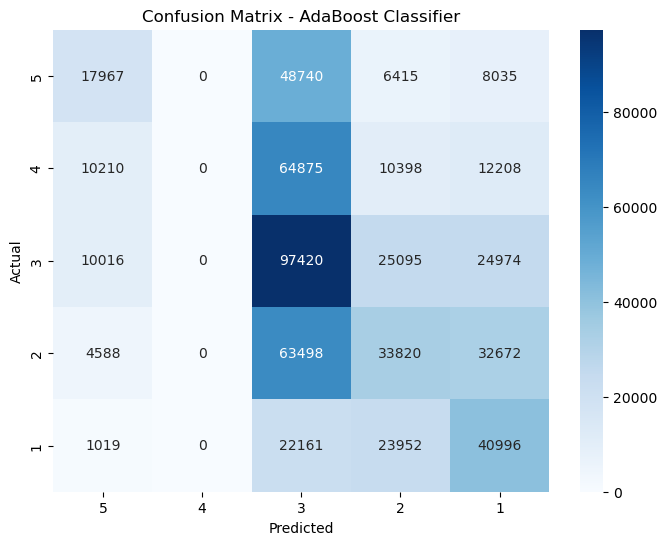

In [31]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming you have trained an AdaBoost model (adaboost) and made predictions (adaboost_predictions_test)
adaboost_predictions_test = adaboost.predict(X_test)

# Round predictions for classification
rounded_adaboost_predictions_test = adaboost_predictions_test.round()

# Create confusion matrix
conf_matrix_adaboost = confusion_matrix(y_test, rounded_adaboost_predictions_test)

# Display the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix_adaboost, annot=True, fmt='d', cmap='Blues', xticklabels=choices, yticklabels=choices)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix - AdaBoost Classifier')
plt.show()


In [39]:
from sklearn.metrics import f1_score

# Naive Bayes
f1_nb_train = f1_score(y_train, naive_bayes_predictions_train, average='weighted')
f1_nb_test = f1_score(y_test, naive_bayes_predictions_test, average='weighted')
print("F1-score - Naive Bayes (Train):", f1_nb_train)
print("F1-score - Naive Bayes (Test):", f1_nb_test)

# AdaBoost
f1_adaboost_train = f1_score(y_train, adaboost_predictions_train, average='weighted')
f1_adaboost_test = f1_score(y_test, adaboost_predictions_test, average='weighted')
print("F1-score - AdaBoost (Train):", f1_adaboost_train)
print("F1-score - AdaBoost (Test):", f1_adaboost_test)

# MLP (Multi-Layer Perceptron)
f1_mlp_train = f1_score(y_train, mlp_predictions_train, average='weighted')
f1_mlp_test = f1_score(y_test, mlp_predictions_test, average='weighted')
print("F1-score - MLP (Train):", f1_mlp_train)
print("F1-score - MLP (Test):", f1_mlp_test)

# Quadratic Discriminant Analysis (QDA)
f1_qda_train = f1_score(y_train, qda_predictions_train, average='weighted')
f1_qda_test = f1_score(y_test, qda_predictions_test, average='weighted')
print("F1-score - QDA (Train):", f1_qda_train)
print("F1-score - QDA (Test):", f1_qda_test)

# Isolation Forest
f1_isolation_forest_train = f1_score(y_train, isolation_forest_predictions_train, average='weighted')
f1_isolation_forest_test = f1_score(y_test, isolation_forest_predictions_test, average='weighted')
print("F1-score - Isolation Forest (Train):", f1_isolation_forest_train)
print("F1-score - Isolation Forest (Test):", f1_isolation_forest_test)


F1-score - Naive Bayes (Train): 0.07703018540190053
F1-score - Naive Bayes (Test): 0.07711561020400762
F1-score - AdaBoost (Train): 0.29457615370104934
F1-score - AdaBoost (Test): 0.2945437887119203
F1-score - MLP (Train): 0.21209594958905975
F1-score - MLP (Test): 0.21237880441108467
F1-score - QDA (Train): 0.12795635331206281
F1-score - QDA (Test): 0.12722933914378798
F1-score - Isolation Forest (Train): 0.03719278714946945
F1-score - Isolation Forest (Test): 0.037018429127867764


In [ ]:
#What model had better results?

In [40]:
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import mean_squared_error, r2_score, f1_score, accuracy_score
from sklearn.ensemble import AdaBoostClassifier

# Assuming you have your features in X and labels in y
# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# the AdaBoost model
adaboost = AdaBoostClassifier(random_state=42)

# Perform cross-validated predictions
cv_predictions_train = cross_val_predict(adaboost, X_train, y_train, cv=5)

#  RMSE for AdaBoost (Cross-Validated)
rmse_adaboost_cv = mean_squared_error(y_train, cv_predictions_train, squared=False)
print("RMSE - AdaBoost (Cross-Validated):", rmse_adaboost_cv)

# R-squared for AdaBoost (Cross-Validated)
r2_adaboost_cv = r2_score(y_train, cv_predictions_train)
print("R-squared - AdaBoost (Cross-Validated):", r2_adaboost_cv)

# F1-score for AdaBoost (Cross-Validated)
f1_adaboost_cv = f1_score(y_train, cv_predictions_train, average='weighted')
print("F1-score - AdaBoost (Cross-Validated):", f1_adaboost_cv)

# Accuracy for AdaBoost (Cross-Validated)
accuracy_adaboost_cv = accuracy_score(y_train, cv_predictions_train)
print("Accuracy Score - AdaBoost (Cross-Validated):", accuracy_adaboost_cv)


RMSE - AdaBoost (Cross-Validated): 1.3667836526714634
R-squared - AdaBoost (Cross-Validated): -0.15289034833549553
F1-score - AdaBoost (Cross-Validated): 0.29393299194282535
Accuracy Score - AdaBoost (Cross-Validated): 0.3404363403504818


In [ ]:
# No major increase in accuracy, the AdaBoost Model is good enough for production

### Problem 4. 
For this problem, you'll create clustering models using techniques other than K-Means clustering.

* Select relevant columns from the cleaned data for clustering. Briefly explain your choices and determine the appropriate number of clusters (K) you want to use and justify your reasoning.
* Implement three clustering models with the chosen features and predict cluster assignments for data points.
* Explore methods to compare the generated models. Discuss suitable metrics and compare their performance. Select the preferred model based on the chosen metric and justify your choice.
* Explain how you'll utilize the chosen clustering model to gain insights from the data.
* Based on your analysis, extract up to three key insights gleaned from using clustering techniques. Briefly describe how you arrived at these insights.


In [41]:

import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline


X1 = df_dummies.values

# Standardize the data
scaler = StandardScaler()
kmeans = KMeans(random_state=42)
pipeline = make_pipeline(scaler, kmeans)

# Fit KMeans clustering for different k values
ks = range(1, 11)
inertias = []

for k in ks:
    pipeline.set_params(kmeans__n_clusters=k)
    pipeline.fit(X1)
    inertias.append(pipeline.named_steps['kmeans'].inertia_)

/Users/arnoldukagwu/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/Users/arnoldukagwu/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/Users/arnoldukagwu/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/Users/arnoldukagwu/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of

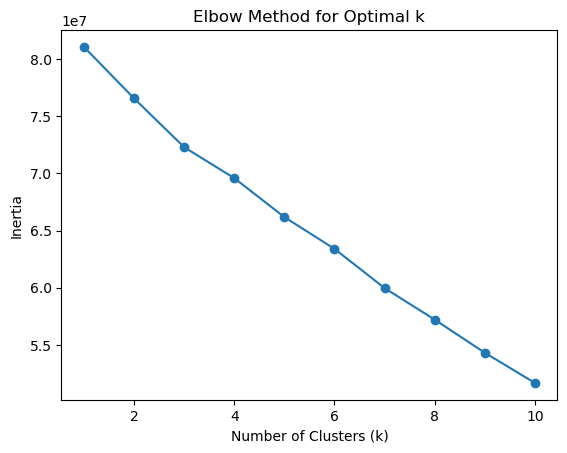

In [42]:
# Plot the elbow graph
plt.plot(ks, inertias, marker='o')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Inertia')
plt.title('Elbow Method for Optimal k')
plt.show()

/Users/arnoldukagwu/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/Users/arnoldukagwu/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/Users/arnoldukagwu/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/Users/arnoldukagwu/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of

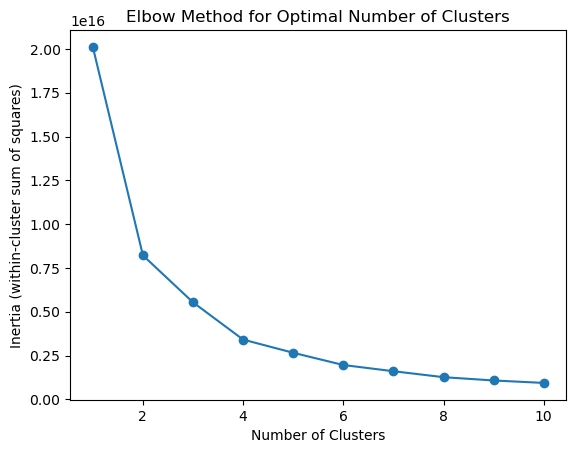

In [43]:
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA

# Use the elbow method to find the optimal number of clusters
inertia_values = []
possible_clusters = range(1, 11)  # You can adjust the range based on your data

for num_clusters in possible_clusters:
    kmeans = KMeans(n_clusters=num_clusters, random_state=42)
    kmeans.fit(X)
    inertia_values.append(kmeans.inertia_)

# Plot the elbow graph
plt.plot(possible_clusters, inertia_values, marker='o')
plt.title('Elbow Method for Optimal Number of Clusters')
plt.xlabel('Number of Clusters')
plt.ylabel('Inertia (within-cluster sum of squares)')
plt.show()


/Users/arnoldukagwu/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/Users/arnoldukagwu/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/Users/arnoldukagwu/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/Users/arnoldukagwu/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of

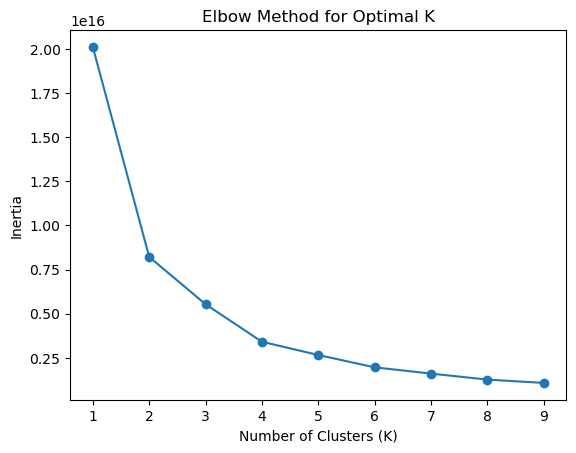

Count of data points in each cluster:
Cluster
0    1407062
1    1376853
2      11380
Name: count, dtype: int64


In [44]:
from sklearn.cluster import KMeans, MiniBatchKMeans, OPTICS
import matplotlib.pyplot as plt

#optics cluster model
# Fit KMeans clustering with the chosen number of clusters
chosen_k = 3
kmeans = KMeans(n_clusters=chosen_k)
kmeans.fit(X1)

# Predict cluster assignments for data points
df_dummies['Cluster'] = kmeans.predict(X1)

ks = range(1, 10)  # Adjust the range as needed
inertias = [KMeans(n_clusters=k).fit(X1).inertia_ for k in ks]

plt.plot(ks, inertias, marker='o')
plt.xlabel('Number of Clusters (K)')
plt.ylabel('Inertia')
plt.title('Elbow Method for Optimal K')
plt.show()

# Display the count of data points in each cluster
print("Count of data points in each cluster:")
print(df_dummies['Cluster'].value_counts())

In [45]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import MiniBatchKMeans
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline


# Standardize the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X1)

#  pipeline for clustering
pipeline = make_pipeline(StandardScaler(), MiniBatchKMeans(n_clusters=3, random_state=42))

# Fit Mini-Batch KMeans clustering with the number of clusters
pipeline.fit(X_scaled)

from sklearn.metrics import silhouette_score


# Predict cluster assignments for data points
df_dummies['Cluster'] = pipeline.predict(X_scaled)


print(df_dummies['Cluster'].value_counts())

/Users/arnoldukagwu/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1930: FutureWarning: The default value of `n_init` will change from 3 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=3)


Cluster
0    1049127
2    1038413
1     707755
Name: count, dtype: int64


In [46]:
from sklearn.mixture import GaussianMixture

# pipeline for GMM clustering
gmm_pipeline = make_pipeline(StandardScaler(), GaussianMixture(n_components=3, random_state=42))

# Fit GMM clustering
gmm_pipeline.fit(X_scaled)

# Predict cluster assignments for data points
df_dummies['GMM_Cluster'] = gmm_pipeline.predict(X_scaled)

# The count of data points in each GMM cluster
print("Count of data points in each GMM cluster:")
print(df_dummies['GMM_Cluster'].value_counts())


Count of data points in each GMM cluster:
GMM_Cluster
0    2106537
1     442420
2     246338
Name: count, dtype: int64


In [ ]:
#Inerta Method for GMM AND K MEANS

In [47]:
from sklearn.metrics import silhouette_score, adjusted_rand_score, normalized_mutual_info_score
inertia_mini_batch_kmeans = pipeline.named_steps['minibatchkmeans'].inertia_
print("MiniBatchKMeans - Inertia:", inertia_mini_batch_kmeans)

MiniBatchKMeans - Inertia: 74794323.19901681


In [48]:
from sklearn.mixture import GaussianMixture

# Fit Gaussian Mixture Model with the chosen number of components
chosen_components = 3
gmm_model = GaussianMixture(n_components=chosen_components, random_state=42)
df_dummies['GMM_Cluster'] = gmm_model.fit_predict(X1)

#  inertia (GMM doesn't have inertia directly, use negative log-likelihood)
inertia_gmm = -gmm_model.score(X1)
print("Inertia for GMM:", inertia_gmm)

Inertia for GMM: -15.426491272943137


In [ ]:
from sklearn.cluster import OPTICS
import numpy as np

# Fit OPTICS clustering
optics_model = OPTICS(min_samples=5, xi=0.05, min_cluster_size=0.1, cluster_method='xi', random_state=42)
df_dummies['OPTICS_Cluster'] = optics_model.fit_predict(X1)

In [ ]:
#  measure based on the reachability distances
reachability_distances = np.array(optics_model.reachability_[optics_model.ordering_])
optics_measure = np.sum(reachability_distances)
print("Measure for OPTICS:", optics_measure)

### Problem 5. 
Upload the AirPassenger data. The dataset has two columns: Month representing the time in a specific format (e.g., "1949-01" for January 1949) and #Passengers representing the number of passengers for each corresponding month.

* Do the Exploratory Data Analysis (EDA) on the data. This involves using date time to extract month and year, showing summary statistics, visualizing the overall distribution of passenger counts, visually inspecting the trend, seasonality, and any apparent patterns, and decomposing the time series into its components (trend, seasonality, residual) and visualize each component.
* Apply ARIMA, Exponential Smoothing, and Prophet. Evaluate the accuracy of all three forecasting methods using appropriate metrics.
* Use autocorrelation and partial autocorrelation plots to identify lag relationships in the time series data.
* Implement a technique such as moving averages or differencing to remove trends and make patterns more apparent.

* Implement an anomaly detection method, such as a rolling average with anomaly thresholds, and Visualize and analyze the identified anomalies in the context of the time series.


In [49]:
import pandas as pd
dataset = pd.read_csv('/Users/arnoldukagwu/Desktop/Homework 2/AirPassengers.csv')

In [50]:
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.seasonal import seasonal_decompose


# Convert 'Month' to datetime format
dataset['Month'] = pd.to_datetime(dataset['Month'])

# Extract month and year
dataset['Month'] = dataset['Month'].dt.to_period('M')
dataset['Year'] = dataset['Month'].dt.year
dataset['Month'] = dataset['Month'].dt.month

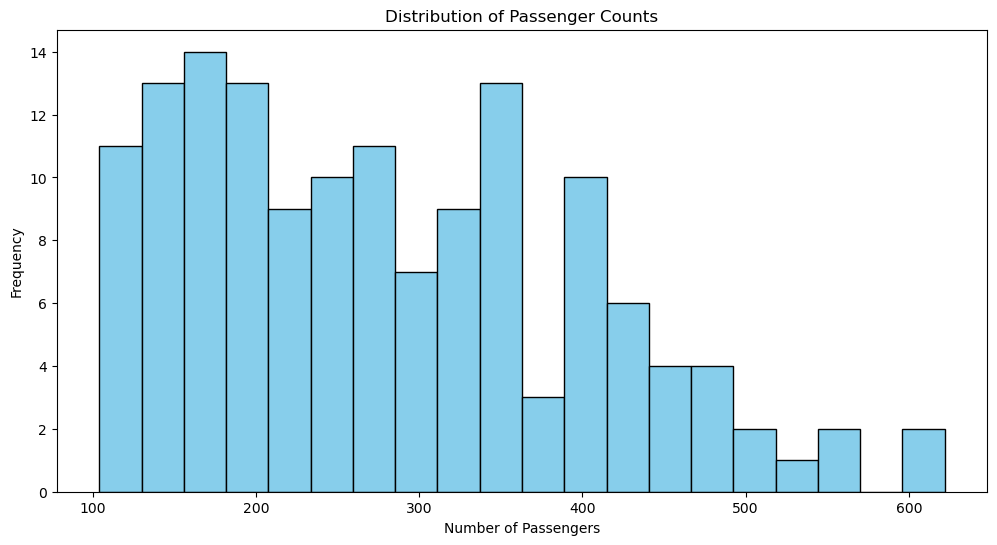

In [51]:
# Visualize the overall distribution of passenger counts
plt.figure(figsize=(12, 6))
plt.hist(dataset['#Passengers'], bins=20, color='skyblue', edgecolor='black')
plt.title('Distribution of Passenger Counts')
plt.xlabel('Number of Passengers')
plt.ylabel('Frequency')
plt.show()

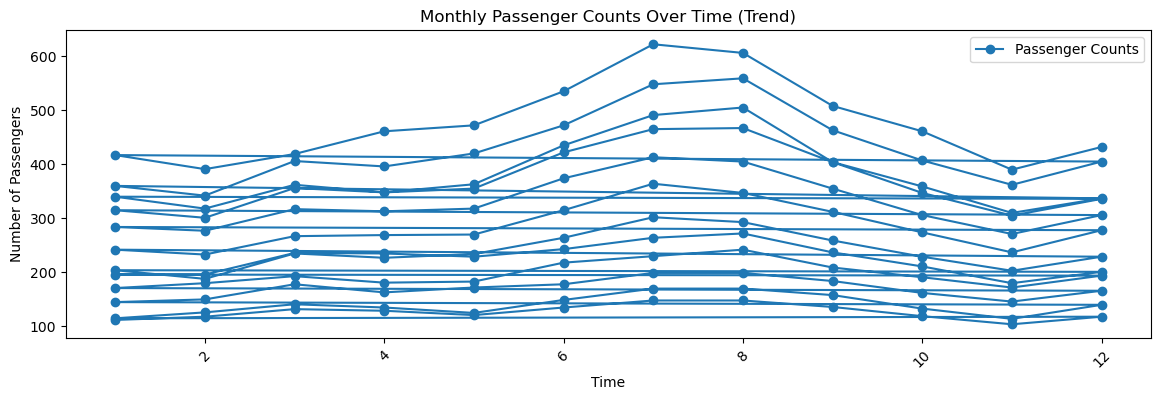

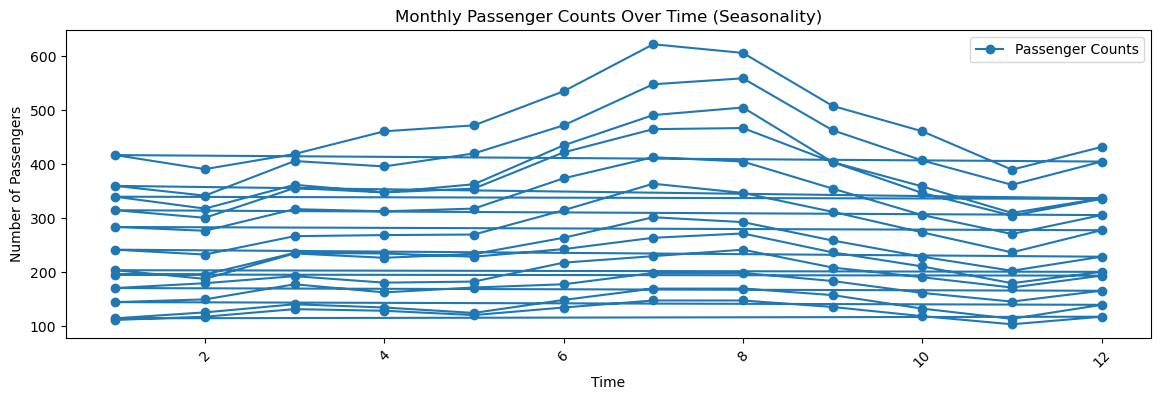

In [52]:
# Visual inspection of trend
plt.figure(figsize=(14, 4))
plt.plot(dataset['Month'], dataset['#Passengers'], label='Passenger Counts', marker='o')
plt.title('Monthly Passenger Counts Over Time (Trend)')
plt.xlabel('Time')
plt.ylabel('Number of Passengers')
plt.xticks(rotation=45)
plt.legend()
plt.show()

# Visual inspection of seasonality
plt.figure(figsize=(14, 4))
plt.plot(dataset['Month'], dataset['#Passengers'], label='Passenger Counts', marker='o')
plt.title('Monthly Passenger Counts Over Time (Seasonality)')
plt.xlabel('Time')
plt.ylabel('Number of Passengers')
plt.xticks(rotation=45)
plt.legend()
plt.show()

In [53]:
# Decompose the time series
result = seasonal_decompose(dataset['#Passengers'], model='multiplicative', period=12)

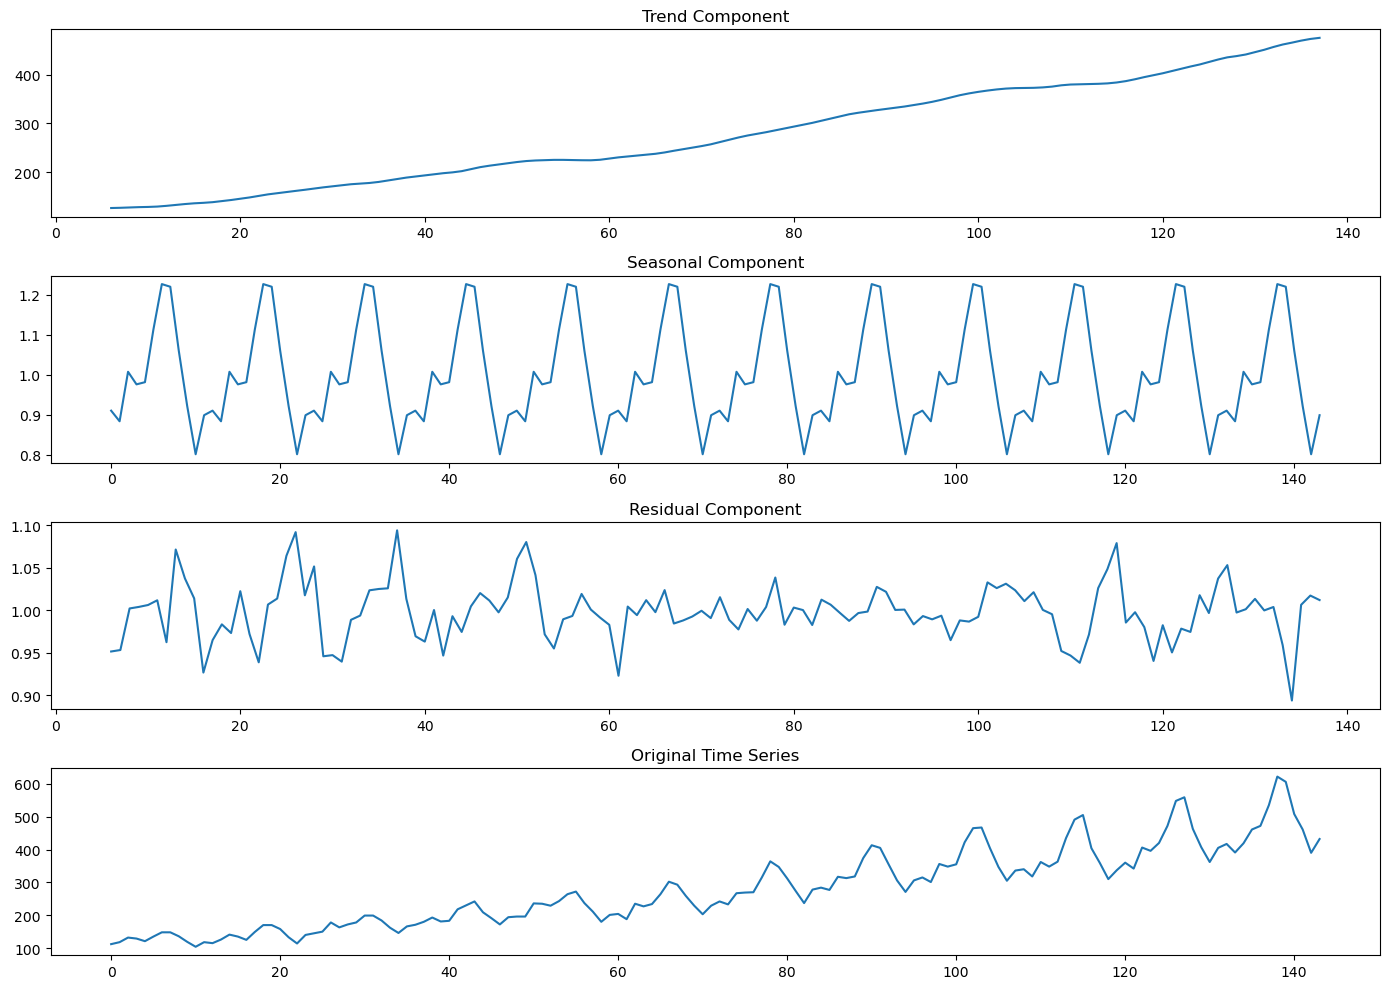

In [54]:

# Visualize each component
plt.figure(figsize=(14, 10))

plt.subplot(4, 1, 1)
plt.plot(result.trend, label='Trend')
plt.title('Trend Component')

plt.subplot(4, 1, 2)
plt.plot(result.seasonal, label='Seasonal')
plt.title('Seasonal Component')

plt.subplot(4, 1, 3)
plt.plot(result.resid, label='Residual')
plt.title('Residual Component')

plt.subplot(4, 1, 4)
plt.plot(dataset['#Passengers'], label='Original')
plt.title('Original Time Series')

plt.tight_layout()
plt.show()

In [65]:
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.arima.model import ARIMA
from sklearn.metrics import mean_squared_error, mean_absolute_error
import numpy as np


# Split the dataset into training and testing sets
train_size = int(len(dataset) * 0.8)  # 80% for training
train, test = dataset[:train_size], dataset[train_size:]

# ARIMA modeling and evaluation
model_arima = ARIMA(train['#Passengers'], order=(1, 1, 1))
fit_arima = model_arima.fit()

# Define evaluation function
def evaluate_forecasts(actual, predicted):
    mse = mean_squared_error(actual, predicted)
    mae = mean_absolute_error(actual, predicted)
    rmse = np.sqrt(mse)
    return mse, mae, rmse

# Generate forecasts
forecast_values = fit_arima.forecast(steps=len(test))
# Extract actual values from the testing dataset
actual_values = test['#Passengers']

# Evaluate forecasts
mse, mae, rmse = evaluate_forecasts(actual_values, forecast_values)
print("Mean Squared Error (MSE):", mse)
print("Mean Absolute Error (MAE):", mae)
print("Root Mean Squared Error (RMSE):", rmse)


Mean Squared Error (MSE): 9506.17582946133
Mean Absolute Error (MAE): 85.254155927327
Root Mean Squared Error (RMSE): 97.4996196375213


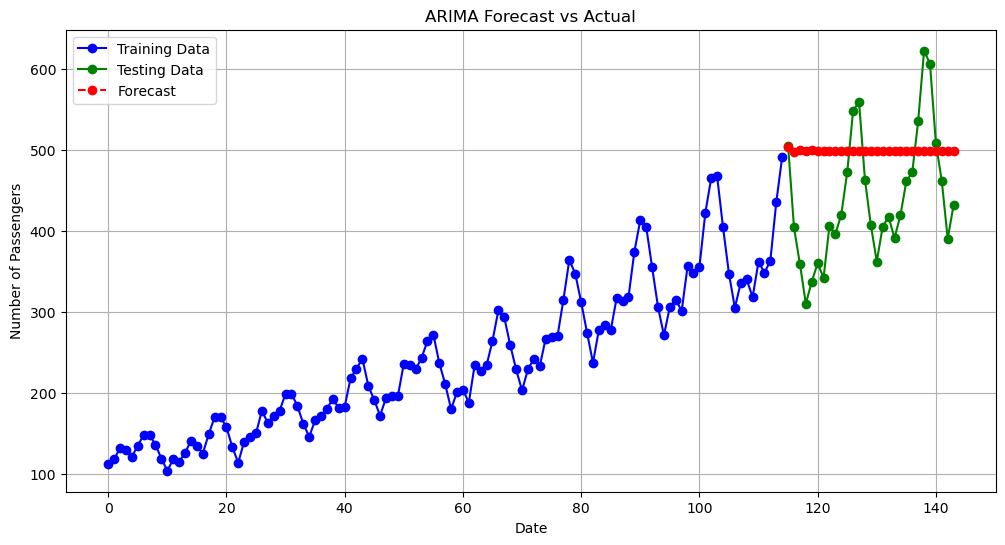

In [66]:
# Plot training, testing, and forecasted data
plt.figure(figsize=(12, 6))

# Plot training data
plt.plot(train.index, train['#Passengers'], label='Training Data', color='blue', marker='o')

# Plot testing data
plt.plot(test.index, test['#Passengers'], label='Testing Data', color='green', marker='o')

# Plot forecasted values
plt.plot(test.index, forecast_values, label='Forecast', color='red', marker='o', linestyle='dashed')

plt.title('ARIMA Forecast vs Actual')
plt.xlabel('Date')
plt.ylabel('Number of Passengers')
plt.legend()
plt.grid(True)
plt.show()

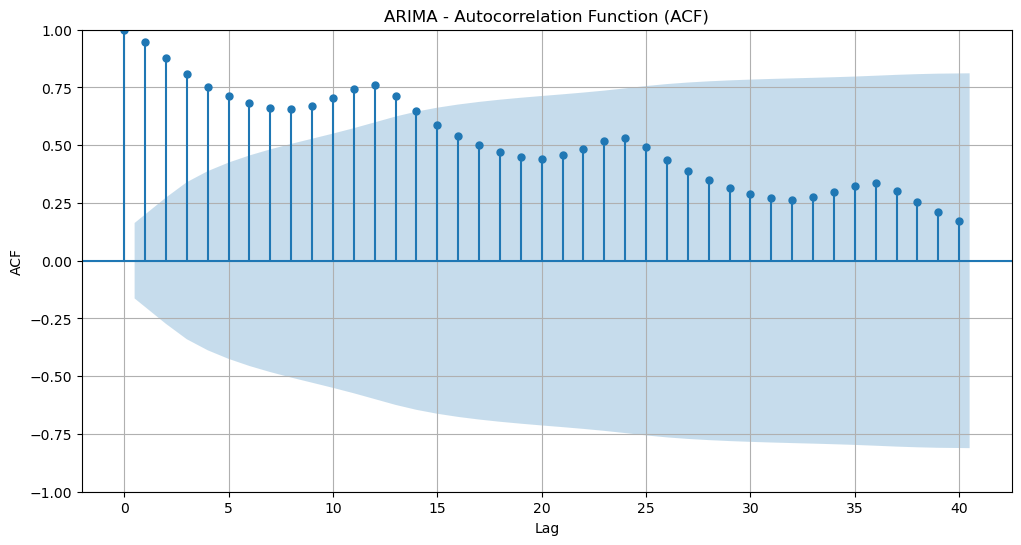

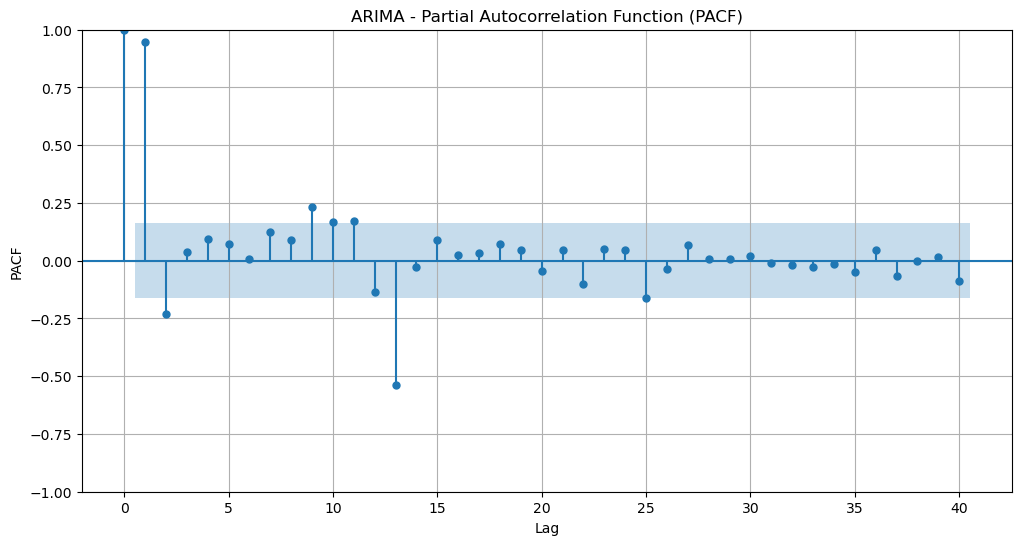

In [67]:
import matplotlib.pyplot as plt
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf


# Plot ACF for ARIMA
plt.figure(figsize=(12, 6))
plot_acf(dataset['#Passengers'], lags=40, ax=plt.gca())
plt.title('ARIMA - Autocorrelation Function (ACF)')
plt.xlabel('Lag')
plt.ylabel('ACF')
plt.grid(True)
plt.show()

# Plot PACF for ARIMA
plt.figure(figsize=(12, 6))
plot_pacf(dataset['#Passengers'], lags=40, ax=plt.gca())
plt.title('ARIMA - Partial Autocorrelation Function (PACF)')
plt.xlabel('Lag')
plt.ylabel('PACF')
plt.grid(True)
plt.show()


In [68]:
# ARIMA Model
import itertools
from statsmodels.tsa.arima.model import ARIMA

# Grid search for ARIMA model parameters
p_values = range(0, 3)
d_values = range(0, 2)
q_values = range(0, 3)

best_aic = float("inf")
best_params = None

for p, d, q in itertools.product(p_values, d_values, q_values):
    try:
        # Fit ARIMA model
        arima_model = ARIMA(dataset['#Passengers'], order=(p, d, q))
        arima_result = arima_model.fit()

        # Compare AIC
        if arima_result.aic < best_aic:
            best_aic = arima_result.aic
            best_params = (p, d, q)
    except:
        continue

# Print best model parameters
print("Best ARIMA model parameters (p, d, q):", best_params)

# Fit ARIMA model with best parameters
arima_model = ARIMA(dataset['#Passengers'], order=best_params)
arima_result = arima_model.fit()

# Summary of the ARIMA model
print(arima_result.summary())

/Users/arnoldukagwu/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
/Users/arnoldukagwu/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
/Users/arnoldukagwu/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/statespace/sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
/Users/arnoldukagwu/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA pa

Best ARIMA model parameters (p, d, q): (2, 1, 2)
                               SARIMAX Results                                
Dep. Variable:            #Passengers   No. Observations:                  144
Model:                 ARIMA(2, 1, 2)   Log Likelihood                -671.673
Date:                Tue, 20 Feb 2024   AIC                           1353.347
Time:                        03:48:26   BIC                           1368.161
Sample:                             0   HQIC                          1359.366
                                - 144                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          1.6850      0.020     83.060      0.000       1.645       1.725
ar.L2         -0.9548      0.017    -55.420      0.000      -0.989      -0.921
ma.

/Users/arnoldukagwu/anaconda3/lib/python3.11/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


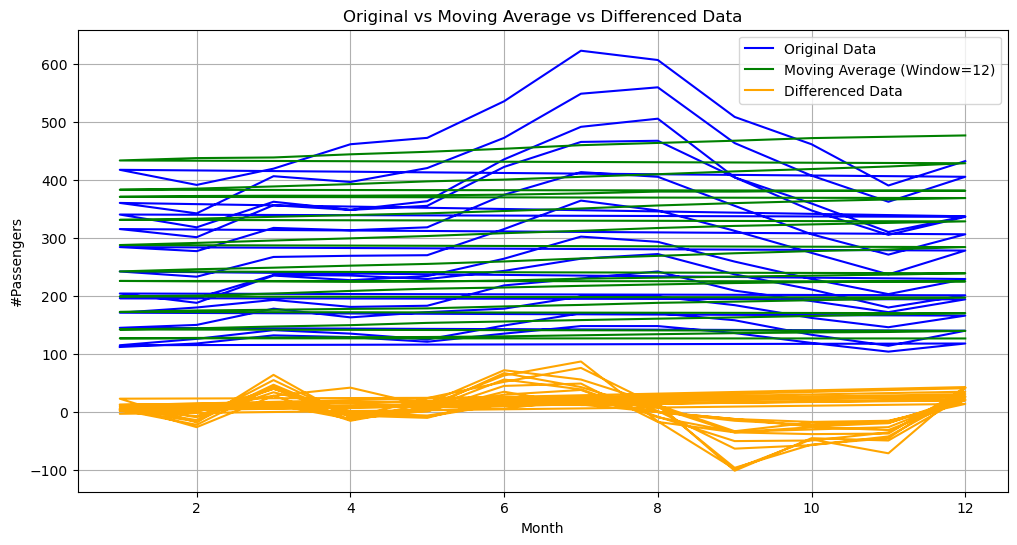

In [69]:

# Calculate the moving average
window_size = 12  # You can adjust the window size based on your data
dataset['MA'] = dataset['#Passengers'].rolling(window=window_size).mean()

# Calculate the difference (differencing)
dataset['Diff'] = dataset['#Passengers'].diff()

# Plot the original, moving average, and differenced data
plt.figure(figsize=(12, 6))
plt.plot(dataset['Month'], dataset['#Passengers'], label='Original Data', color='blue')
plt.plot(dataset['Month'], dataset['MA'], label=f'Moving Average (Window={window_size})', color='green')
plt.plot(dataset['Month'], dataset['Diff'], label='Differenced Data', color='orange')
plt.title('Original vs Moving Average vs Differenced Data')
plt.xlabel('Month')
plt.ylabel('#Passengers')
plt.legend()
plt.grid(True)
plt.show()

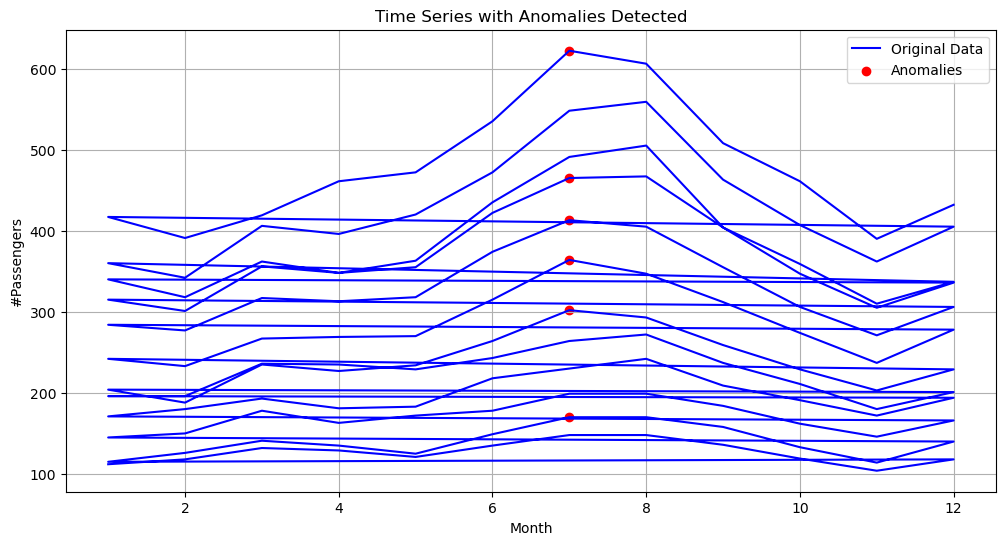

In [70]:
# Calculate rolling average and standard deviation
window_size = 12  # You can adjust the window size based on your data
dataset['Rolling_Avg'] = dataset['#Passengers'].rolling(window=window_size).mean()
dataset['Rolling_Std'] = dataset['#Passengers'].rolling(window=window_size).std()

# Calculate z-score
dataset['Z_Score'] = np.abs((dataset['#Passengers'] - dataset['Rolling_Avg']) / dataset['Rolling_Std'])

# Set a threshold for anomalies (e.g., z-score > 2, you can adjust this threshold)
anomaly_threshold = 2

# Identify anomalies
dataset['Anomaly'] = dataset['Z_Score'] > anomaly_threshold

# Plot the time series with anomalies highlighted
plt.figure(figsize=(12, 6))
plt.plot(dataset['Month'], dataset['#Passengers'], label='Original Data', color='blue')
plt.scatter(dataset[dataset['Anomaly']]['Month'], dataset[dataset['Anomaly']]['#Passengers'], color='red', label='Anomalies')
plt.title('Time Series with Anomalies Detected')
plt.xlabel('Month')
plt.ylabel('#Passengers')
plt.legend()
plt.grid(True)
plt.show()



Triple Exponential Smoothing Evaluation:
MSE: 21843.307614307116
MAE: 125.79171234474477
RMSE: 147.7948159250084


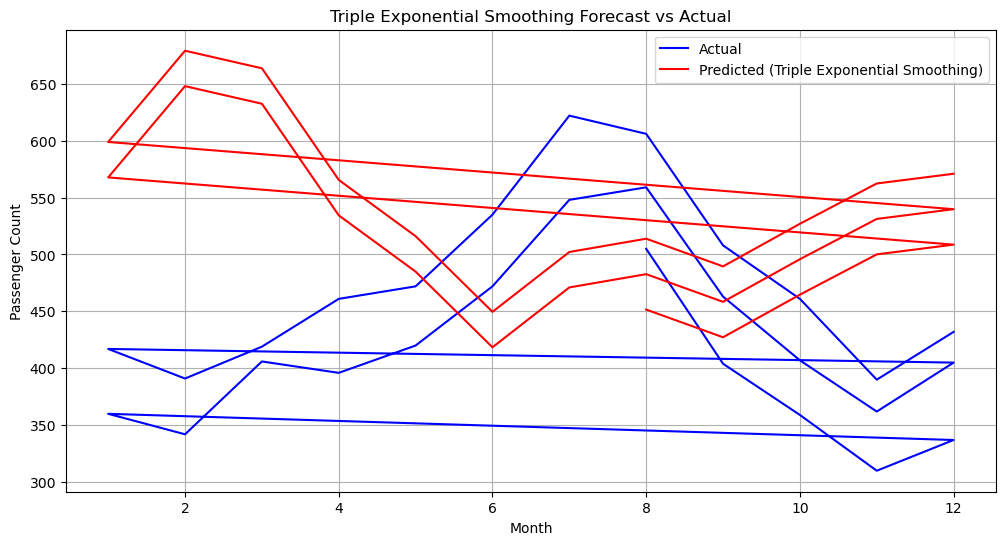

In [76]:
# Exponential Smoothing Models
from statsmodels.tsa.holtwinters import ExponentialSmoothing

# Define and fit Triple Exponential Smoothing (Holt-Winters' Method)
model_triple = ExponentialSmoothing(dataset['#Passengers'], trend='add', seasonal='add', seasonal_periods=12)
fit_model_triple = model_triple.fit()

# Make predictions
predictions_triple = fit_model_triple.predict(start=len(dataset), end=len(dataset) + len(test) - 1)

# Evaluate and print metrics
mse_triple = mean_squared_error(test['#Passengers'], predictions_triple)
mae_triple = mean_absolute_error(test['#Passengers'], predictions_triple)
rmse_triple = np.sqrt(mse_triple)

print("\nTriple Exponential Smoothing Evaluation:")
print("MSE:", mse_triple)
print("MAE:", mae_triple)
print("RMSE:", rmse_triple)

# Visualize actual vs predicted values for Triple Exponential Smoothing
plt.figure(figsize=(12, 6))
plt.plot(test['Month'], test['#Passengers'], label='Actual', color='blue')
plt.plot(test['Month'], predictions_triple, label='Predicted (Triple Exponential Smoothing)', color='red')
plt.title('Triple Exponential Smoothing Forecast vs Actual')
plt.xlabel('Month')
plt.ylabel('Passenger Count')
plt.legend()
plt.grid(True)
plt.show()

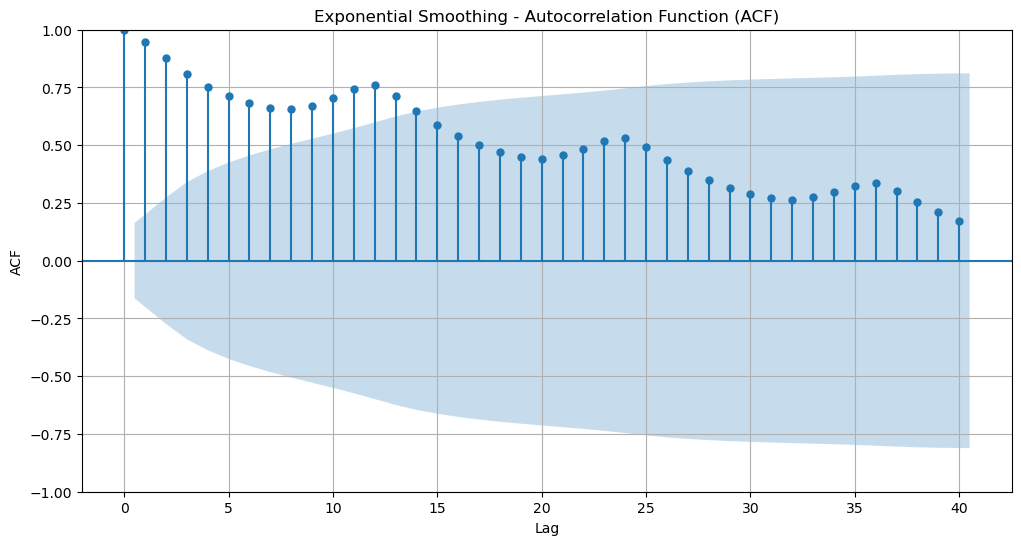

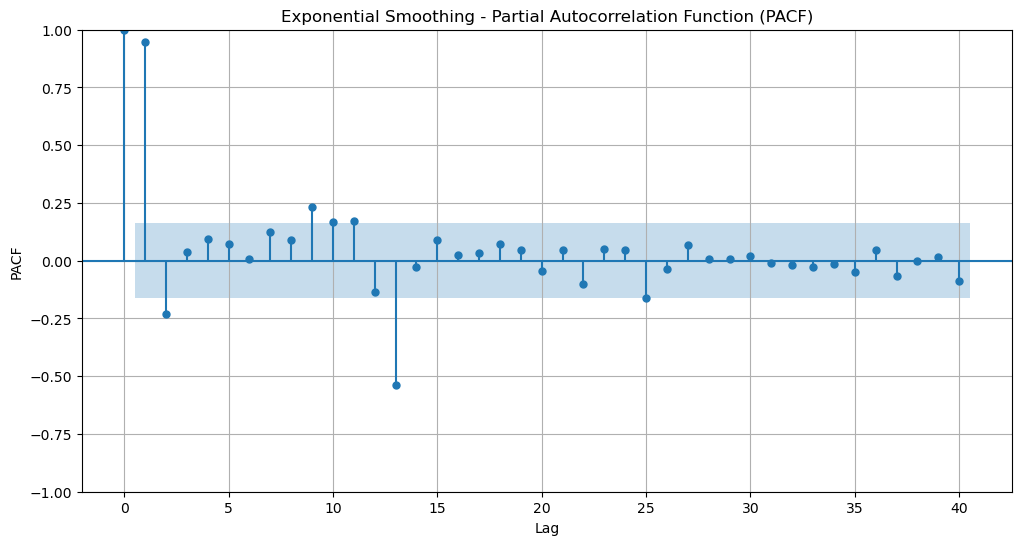

In [78]:
import matplotlib.pyplot as plt
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

# Assuming 'traindf' is your training DataFrame for Exponential Smoothing
# Replace 'your_column_name' with the actual column name containing passenger counts

# Plot ACF for Exponential Smoothing
plt.figure(figsize=(12, 6))
plot_acf(dataset['#Passengers'], lags=40, ax=plt.gca())
plt.title('Exponential Smoothing - Autocorrelation Function (ACF)')
plt.xlabel('Lag')
plt.ylabel('ACF')
plt.grid(True)
plt.show()

# Plot PACF for Exponential Smoothing
plt.figure(figsize=(12, 6))
plot_pacf(dataset['#Passengers'], lags=40, ax=plt.gca())
plt.title('Exponential Smoothing - Partial Autocorrelation Function (PACF)')
plt.xlabel('Lag')
plt.ylabel('PACF')
plt.grid(True)
plt.show()

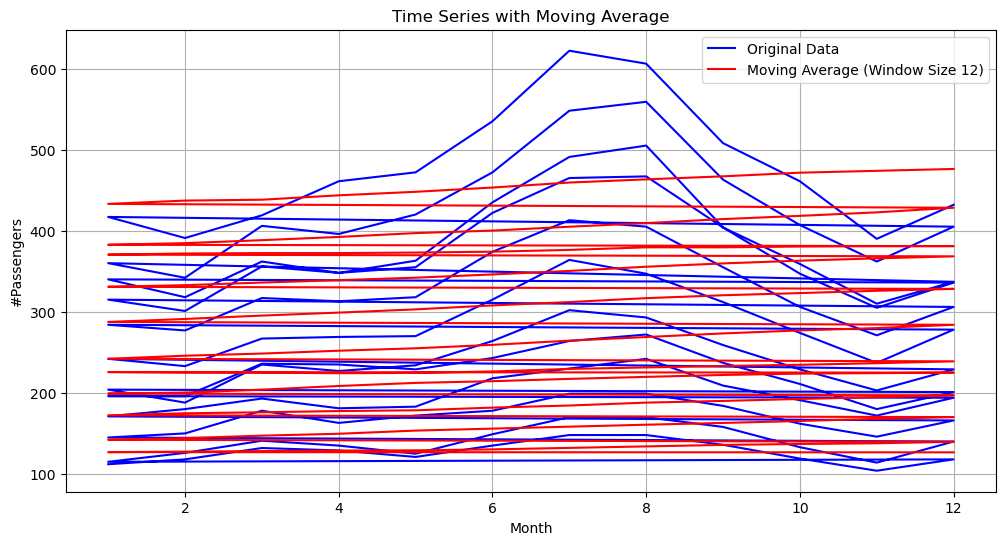

In [79]:

# Calculate the moving average with a specified window size
window_size = 12  # You can adjust the window size based on your data
dataset['Moving_Avg'] = dataset['#Passengers'].rolling(window=window_size).mean()

# Plot the time series with the original data and the moving average
plt.figure(figsize=(12, 6))
plt.plot(dataset['Month'], dataset['#Passengers'], label='Original Data', color='blue')
plt.plot(dataset['Month'], dataset['Moving_Avg'], label=f'Moving Average (Window Size {window_size})', color='red')
plt.title('Time Series with Moving Average')
plt.xlabel('Month')
plt.ylabel('#Passengers')
plt.legend()
plt.grid(True)
plt.show()

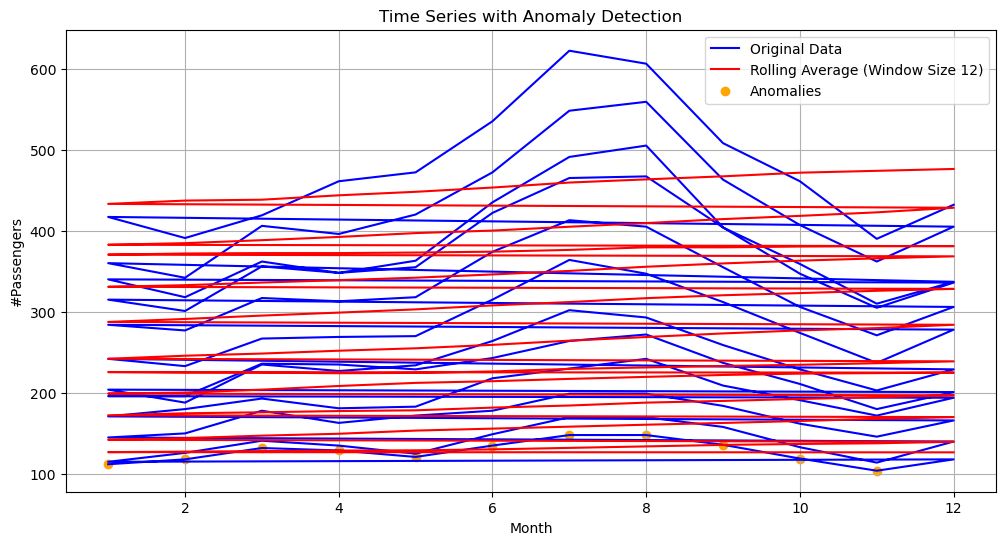

Identified Anomalies:
    Month  #Passengers
0       1          112
1       2          118
2       3          132
3       4          129
4       5          121
5       6          135
6       7          148
7       8          148
8       9          136
9      10          119
10     11          104


In [80]:
# Calculate the rolling average with a specified window size
window_size = 12  # You can adjust the window size based on your data
dataset['Rolling_Avg'] = dataset['#Passengers'].rolling(window=window_size).mean()

# Calculate the standard deviation of the series
std_dev = dataset['#Passengers'].std()

# Define anomaly thresholds (you can adjust the multiplier based on your data and desired sensitivity)
lower_threshold = dataset['Rolling_Avg'] - 2 * std_dev
upper_threshold = dataset['Rolling_Avg'] + 2 * std_dev

# Identify anomalies based on the thresholds
anomalies = dataset[~((dataset['#Passengers'] >= lower_threshold) & (dataset['#Passengers'] <= upper_threshold))]

# Plot the time series with the original data, rolling average, and anomalies
plt.figure(figsize=(12, 6))
plt.plot(dataset['Month'], dataset['#Passengers'], label='Original Data', color='blue')
plt.plot(dataset['Month'], dataset['Rolling_Avg'], label=f'Rolling Average (Window Size {window_size})', color='red')
plt.scatter(anomalies['Month'], anomalies['#Passengers'], color='orange', label='Anomalies')
plt.title('Time Series with Anomaly Detection')
plt.xlabel('Month')
plt.ylabel('#Passengers')
plt.legend()
plt.grid(True)
plt.show()

# Display information about identified anomalies
print("Identified Anomalies:")
print(anomalies[['Month', '#Passengers']])

In [81]:
pip install convertdate


Note: you may need to restart the kernel to use updated packages.


In [82]:
# Prepare the data for Prophet
train_data = dataset.copy()  # Create a copy to keep the original DataFrame intact
train_data['ds'] = pd.to_datetime(train_data['Month'])  # Convert 'Month' column to datetime format
train_data.rename(columns={'#Passengers': 'y'}, inplace=True)  # Rename '#Passengers' to 'y' as required by Prophet


In [84]:
from prophet import Prophet

In [85]:
# Initialize and fit the Prophet model
model_prophet = Prophet()
model_prophet.fit(train_data)

03:55:37 - cmdstanpy - INFO - Chain [1] start processing
03:55:37 - cmdstanpy - INFO - Chain [1] done processing


In [86]:
# Create a dataframe with future dates for prediction
future = model_prophet.make_future_dataframe(periods=12, freq='M')  # Assuming you want to forecast for the next 12 months

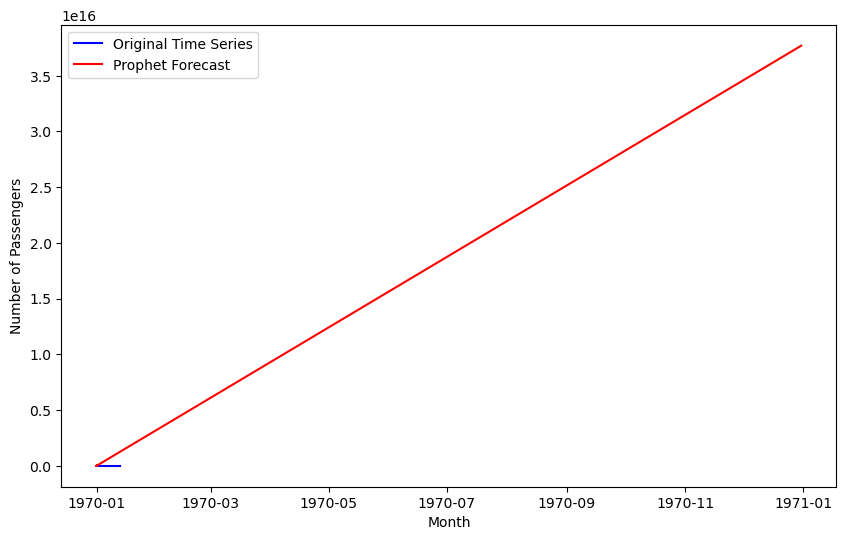

In [87]:
# Generate forecasts
forecast = model_prophet.predict(future)

# Plot the original time series and the forecast
fig, ax = plt.subplots(figsize=(10, 6))
ax.plot(dataset['Month'], dataset['#Passengers'], label='Original Time Series', color='blue')
ax.plot(forecast['ds'], forecast['yhat'], label='Prophet Forecast', color='red')
ax.set_xlabel('Month')
ax.set_ylabel('Number of Passengers')
ax.legend()
plt.show()

In [ ]:
# Assuming you have the actual values and forecast dataframe
actual_values = dataset['#Passengers']
predicted_values = forecast['yhat']

# Define evaluation function
def evaluate_forecasts(actual, predicted):
    mse = mean_squared_error(actual, predicted)
    mae = mean_absolute_error(actual, predicted)
    rmse = np.sqrt(mse)
    return mse, mae, rmse

# Evaluate forecasts
mse, mae, rmse = evaluate_forecasts(actual_values, predicted_values)
print("Prophet - Mean Squared Error (MSE):", mse)
print("Prophet - Mean Absolute Error (MAE):", mae)
print("Prophet - Root Mean Squared Error (RMSE):", rmse)

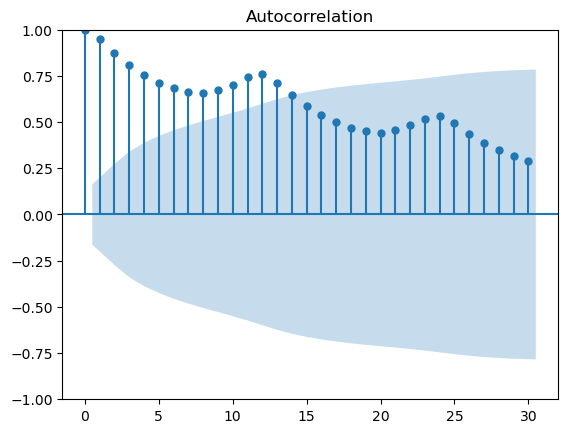

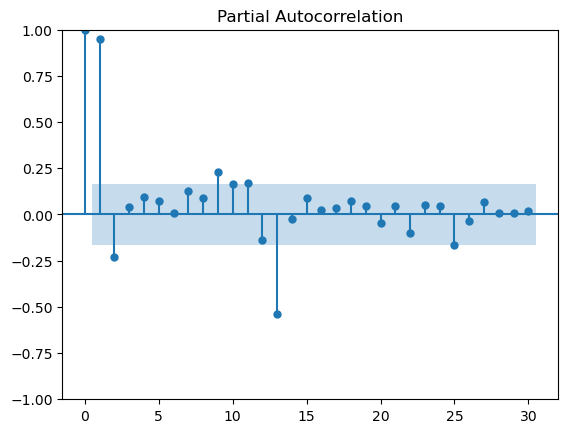

In [89]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
import matplotlib.pyplot as plt

# Plot autocorrelation
plot_acf(dataset['#Passengers'], lags=30)
plt.show()

# Plot partial autocorrelation
plot_pacf(dataset['#Passengers'], lags=30)
plt.show()


In [90]:
# Differencing
dataset['Differenced'] = dataset['#Passengers'].diff()


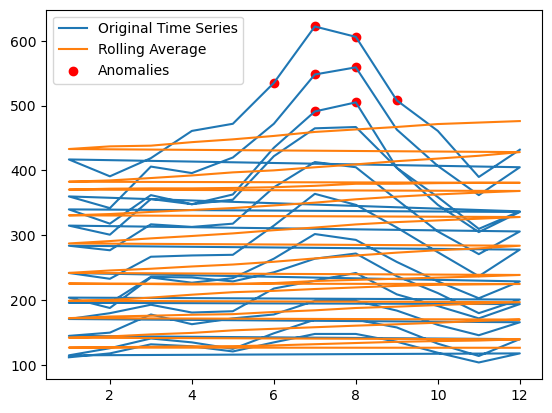

In [91]:
# Calculate rolling average
dataset['Rolling_Avg'] = dataset['#Passengers'].rolling(window=12).mean()

# Set anomaly thresholds (adjust as needed)
lower_threshold = dataset['Rolling_Avg'].mean() - 2 * dataset['Rolling_Avg'].std()
upper_threshold = dataset['Rolling_Avg'].mean() + 2 * dataset['Rolling_Avg'].std()

# Identify anomalies
anomalies = dataset[(dataset['#Passengers'] < lower_threshold) | (dataset['#Passengers'] > upper_threshold)]

# Visualize anomalies
plt.plot(dataset['Month'], dataset['#Passengers'], label='Original Time Series')
plt.plot(dataset['Month'], dataset['Rolling_Avg'], label='Rolling Average')
plt.scatter(anomalies['Month'], anomalies['#Passengers'], color='red', label='Anomalies')
plt.legend()
plt.show()


In [ ]:
Used AI: I utilized AI to Implement a technique such as moving averages and implement an anomaly detection method in context of the time series. It helped in analyzing insights on ACF and PACF as well.

In [ ]:
#Overall using AI helped me approach problems from a different perspective, I was able to understand the decisions for optimizing models more thorough trial and error.